**ML_Assign_01**

*   Name: Hassan Mansoor
*   CMS: 403544
*   Class: BSCS-12A





In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/data_patient_dropout.csv')

# Display the first few rows of the dataset
data.head()


,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


**Let's check for the number of missing values in each column if any:**

In [2]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                9
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          9
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64


Let's view stats of the data to understand it better.

In [3]:
# Basic statistics to understand numerical distributions
print("\nStats :\n", data.describe())


Stats :
        Number of Treatment Sessions Attended  Number of Treatment Goals Set  \
count                            4284.000000                    4275.000000   
mean                               13.878151                       3.488421   
std                                15.934084                       6.789401   
min                                 0.000000                       0.000000   
25%                                 6.000000                       1.000000   
50%                                10.000000                       2.000000   
75%                                17.000000                       5.000000   
max                               436.000000                     225.000000   

       Number of Treatment Goals Revised  Number of Progress Reviews Attended  \
count                        4284.000000                          4275.000000   
mean                            0.867180                             1.444211   
std                             3.0

Lets handle the missing values in the columns: (filling them with mean)

In [4]:
# Handle missing values - fill with mean or other appropriate value
data['Number of Treatment Goals Set'].fillna(data['Number of Treatment Goals Set'].mean(), inplace=True)
data['Number of Progress Reviews Attended'].fillna(data['Number of Progress Reviews Attended'].mean(), inplace=True)

<ipython-input-4-8ada3314abed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of Treatment Goals Set'].fillna(data['Number of Treatment Goals Set'].mean(), inplace=True)
<ipython-input-4-8ada3314abed>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

Checking all columns all numeric, if not, we o or drop unecessary columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient ID                                 4284 non-null   object 
 1   Initial Consultation Attended              4284 non-null   object 
 2   Number of Treatment Sessions Attended      4284 non-null   int64  
 3   Number of Treatment Goals Set              4284 non-null   float64
 4   Number of Treatment Goals Revised          4284 non-null   int64  
 5   Number of Progress Reviews Attended        4284 non-null   float64
 6   Number of Times Treatment Plan Confirmed   4284 non-null   int64  
 7   Number of Times Treatment Phase Initiated  4284 non-null   int64  
 8   Number of Treatment Options Explored       4284 non-null   int64  
 9   Number of Times Logged Into Health Portal  4284 non-null   int64  
 10  Number of Educational Re

We can drop column Patient ID, and we'll encode the 2nd column: Initial Consultation Attended.
1 for yes, 0 for no.

In [6]:
# Drop 'Patient ID' as it is irrelevant for prediction
data.drop('Patient ID', axis=1, inplace=True)

In [7]:
# Convert 'Initial Consultation Attended' from Yes/No to 1/0

data['Initial Consultation Attended'] = data['Initial Consultation Attended'].map({'Yes': 1, 'No': 0})


Patient Segment Type - Categorizes patients into different segments, such as high-risk,
medium-risk, or low-risk of dropout therefore we can One-Hot-Encode it.

In [8]:
# One-Hot Encode 'Patient Segment Type'
data = pd.get_dummies(data, columns=['Patient Segment Type'], drop_first=True)

Patient category low risk is dropped, to avoid perfect multicollinearity. If we drop one category, you can infer it from the other two.

In [9]:
data.head() # viewing the data

,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Treatment Dropped,Patient Segment Type_1,Patient Segment Type_2
0,1,4,1.0,0,0.0,0,0,1,0,0,1,False,False
1,0,38,0.0,0,2.0,0,0,2,0,2,1,False,False
2,0,8,5.0,0,0.0,1,1,1,0,0,0,True,False
3,0,6,0.0,0,2.0,0,0,4,0,0,1,False,False
4,1,31,14.0,12,1.0,0,0,4,0,0,1,False,True


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Initial Consultation Attended              4284 non-null   int64  
 1   Number of Treatment Sessions Attended      4284 non-null   int64  
 2   Number of Treatment Goals Set              4284 non-null   float64
 3   Number of Treatment Goals Revised          4284 non-null   int64  
 4   Number of Progress Reviews Attended        4284 non-null   float64
 5   Number of Times Treatment Plan Confirmed   4284 non-null   int64  
 6   Number of Times Treatment Phase Initiated  4284 non-null   int64  
 7   Number of Treatment Options Explored       4284 non-null   int64  
 8   Number of Times Logged Into Health Portal  4284 non-null   int64  
 9   Number of Educational Resources Viewed     4284 non-null   int64  
 10  Treatment Dropped       

Lets start with Feature Scaling all the numeric columns except the Target Variable.

In [11]:
from sklearn.preprocessing import StandardScaler

# Select numerical features from the dataset
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude the target variable
numerical_features.remove('Treatment Dropped')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in the dataset
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Check the first few rows to verify scaling
data.head()


,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Treatment Dropped,Patient Segment Type_1,Patient Segment Type_2
0,1.593893,-0.620011,-0.366944,-0.282500,-0.694311,-0.361664,-0.859493,-0.214143,-0.422819,-0.818715,1,False,False
1,-0.627395,1.514029,-0.514405,-0.282500,0.267198,-0.361664,-0.859493,-0.048907,-0.422819,-0.121493,1,False,False
2,-0.627395,-0.368947,0.222898,-0.282500,-0.694311,1.570217,0.017399,-0.214143,-0.422819,-0.818715,0,True,False
3,-0.627395,-0.494479,-0.514405,-0.282500,0.267198,-0.361664,-0.859493,0.281564,-0.422819,-0.818715,1,False,False
4,1.593893,1.074668,1.550044,3.626723,-0.213556,-0.361664,-0.859493,0.281564,-0.422819,-0.818715,1,False,True


 we utilized the `StandardScaler` to standardize the numerical features in the dataset. This process involves centering the data around the mean and scaling it to have a unit variance, effectively transforming the features into a standard normal distribution.

Lets check for Outliers in the data using a BoxPlot which might skew the data.

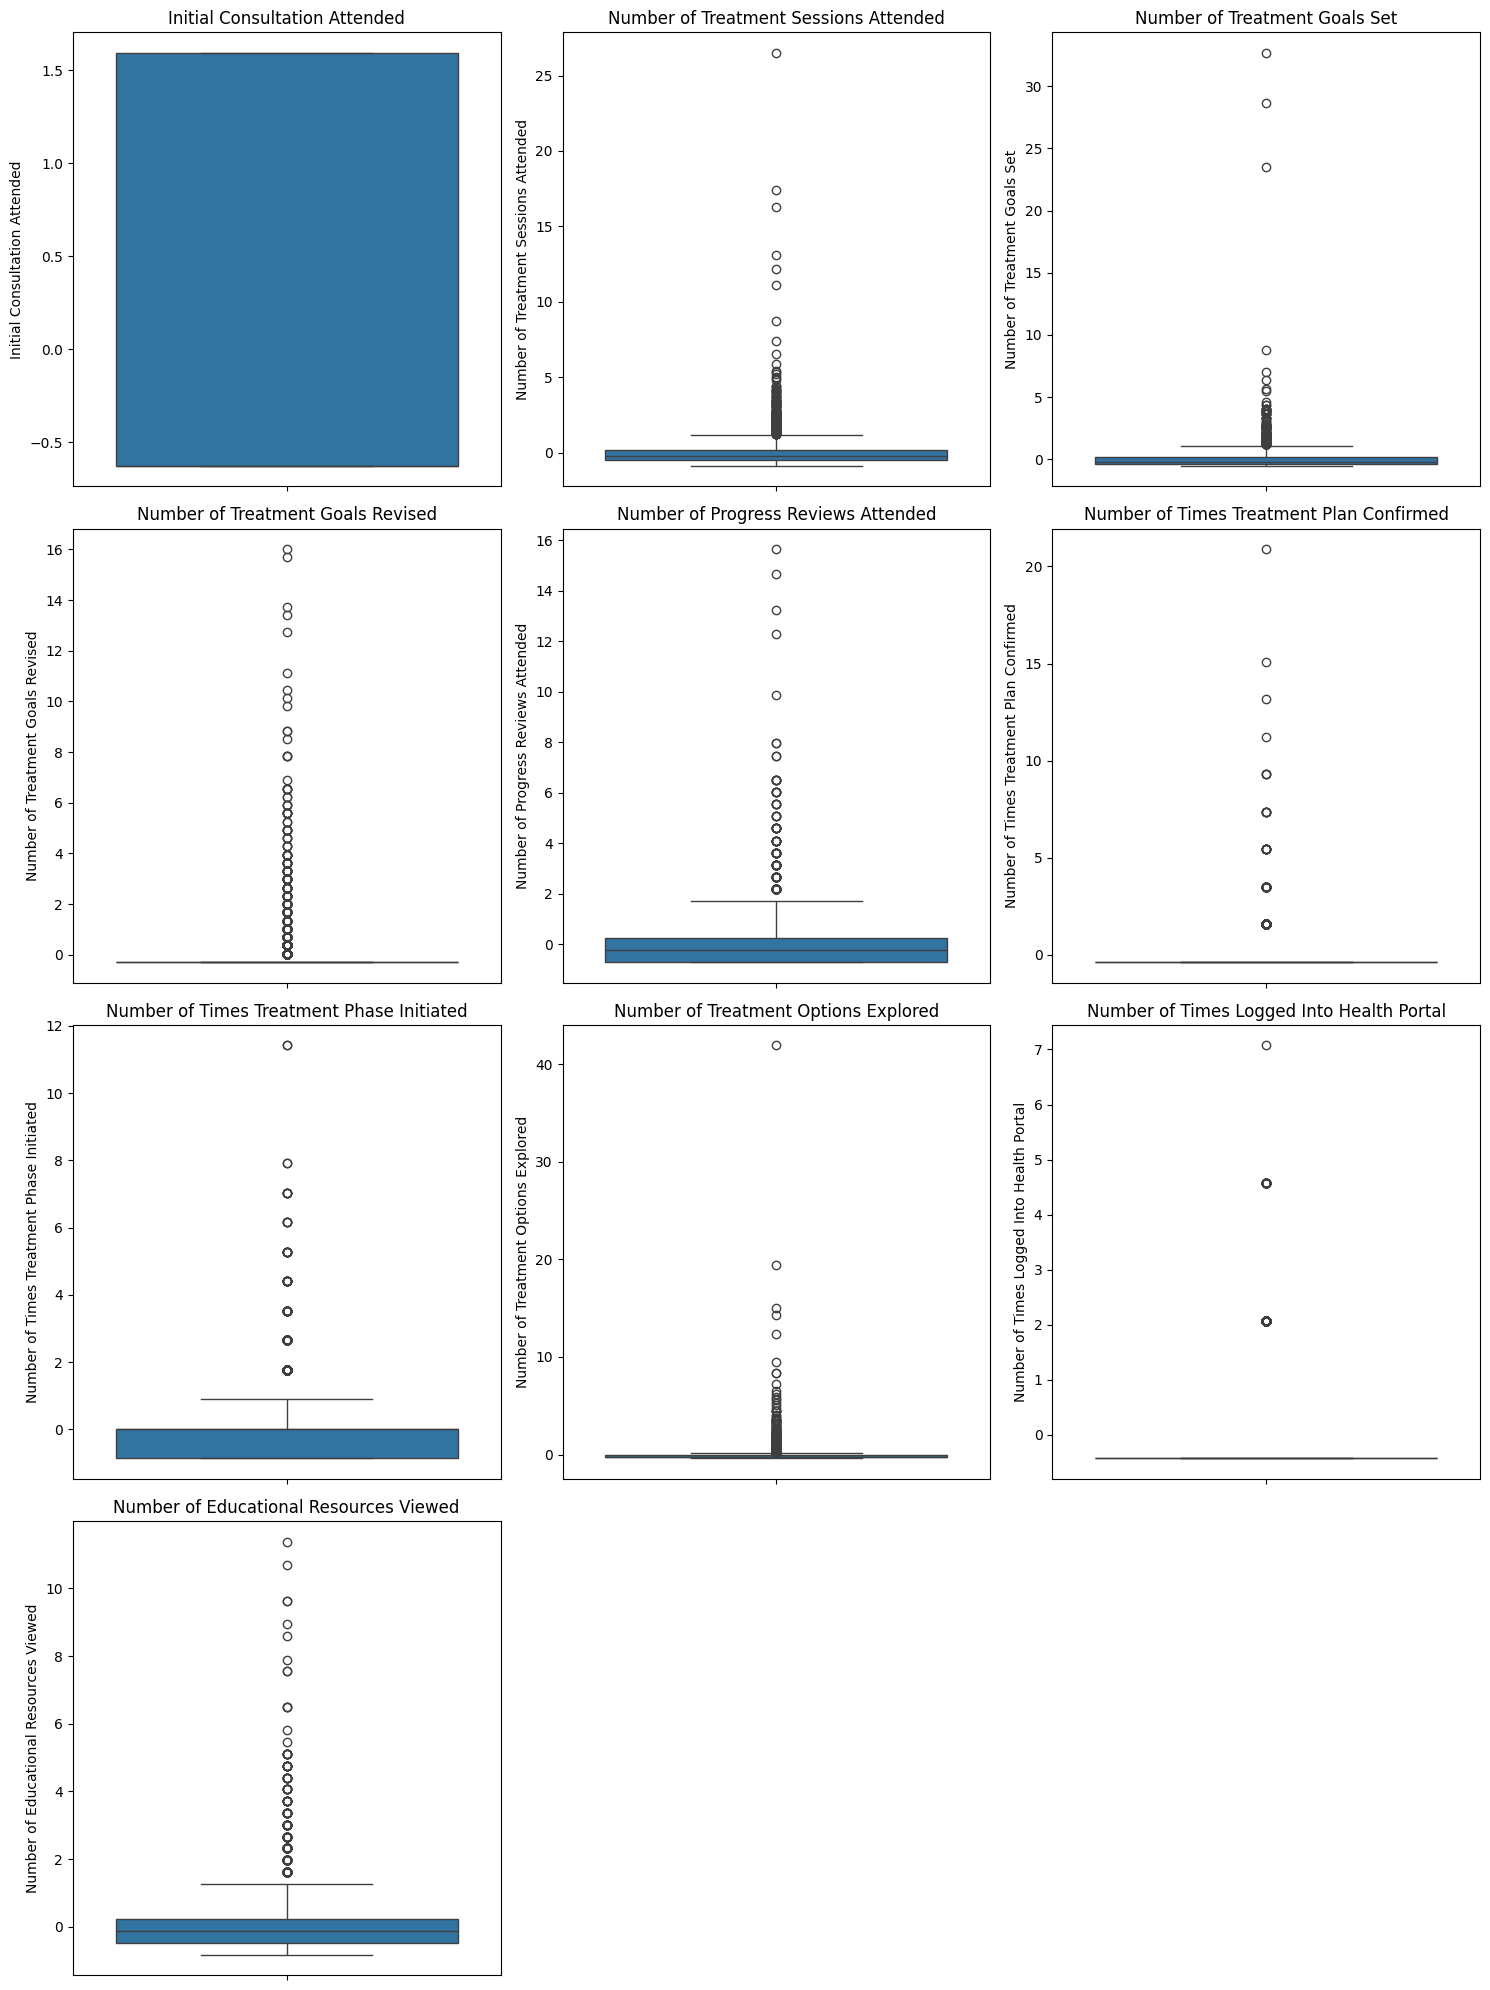

In [12]:
# Calculate the number of rows and columns needed
num_features = len(numerical_features)
num_cols = 3  # Number of columns
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate the number of rows

# Create boxplots for each numerical feature
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on number of rows
for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

In our analysis, we observed that most features exhibited a relatively normal distribution, with some showing a wider range of values. Notably, the presence of outliers in some features indicates variability in the data, which could reflect genuine differences among patients or treatment outcomes.

Despite identifying these outliers, we opted not to modify or remove them from the dataset.

# Feature Engineering

## 1. Correlation Heatmap

We will start with a correlation heatmap, which provides a visual representation of the correlation coefficients between pairs of numerical features. This helps us identify which features have strong relationships with each other and with the target variable ("Treatment Dropped").

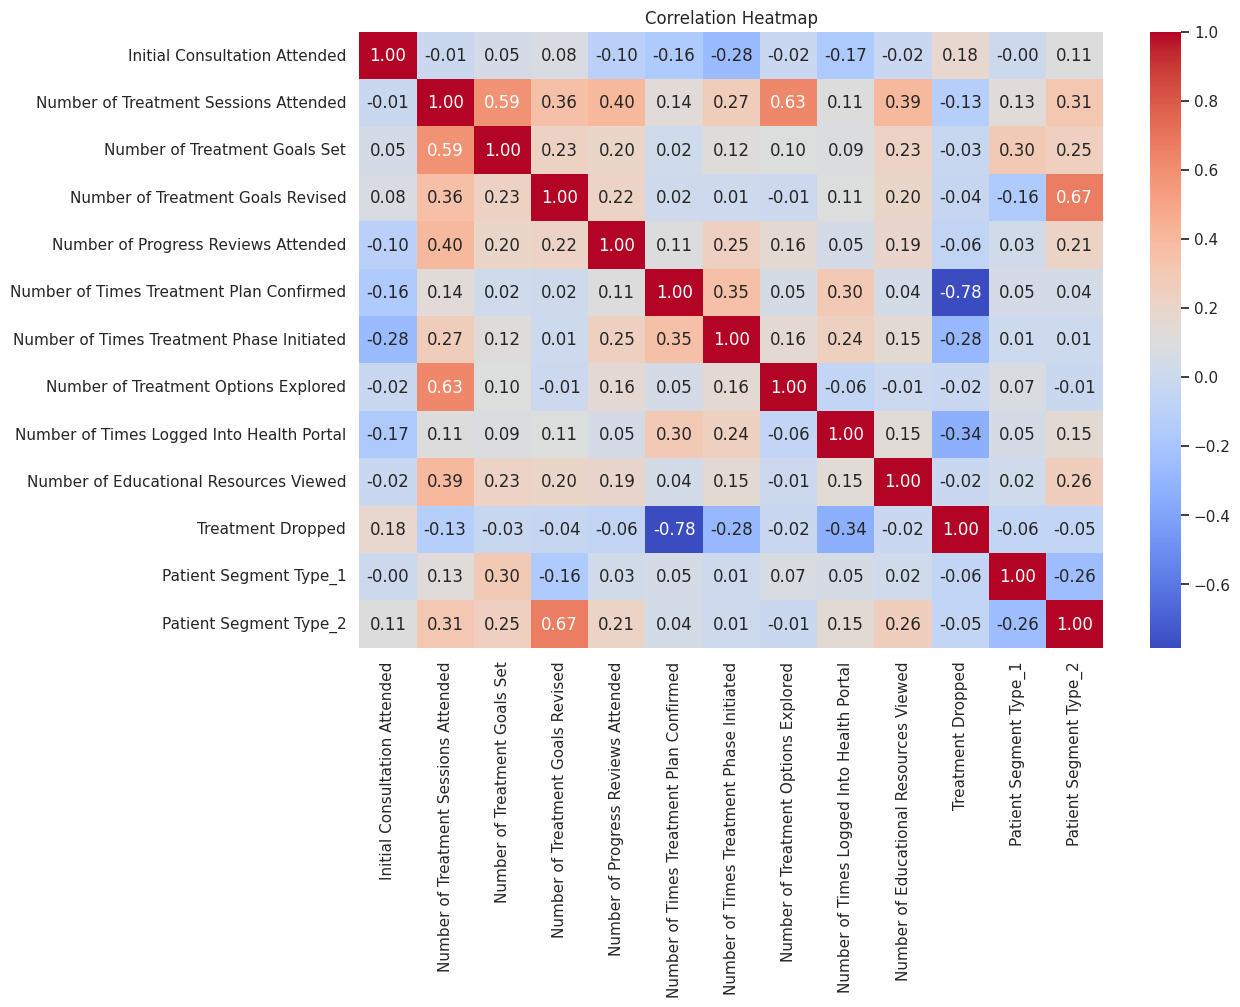

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Interaction Term



We can identify a **moderate to strong positive correlation** (0.63) between these two columns (No.Of Treat. Sessions Attended to Options Explored)

To capture the combined effect of these two features on the likelihood of treatment dropout, we create an **interaction term**.



In [14]:
# Creating the interaction term
data['Sessions_Options_Interaction'] = data['Number of Treatment Sessions Attended'] * data['Number of Treatment Options Explored']

# Displaying the first few rows to confirm the new column has been added
data[['Number of Treatment Sessions Attended', 'Number of Treatment Options Explored', 'Sessions_Options_Interaction']].head()


,Number of Treatment Sessions Attended,Number of Treatment Options Explored,Sessions_Options_Interaction
0,-0.620011,-0.214143,0.132771
1,1.514029,-0.048907,-0.074047
2,-0.368947,-0.214143,0.079008
3,-0.494479,0.281564,-0.139228
4,1.074668,0.281564,0.302588


The interaction term is calculated by multiplying the **Number of Treatment Sessions Attended** with the **Number of Treatment Options Explored**. We will add this new feature, **Sessions_Options_Interaction**, to our dataset.

Identifying relevant features for predicting patient dropout proved challenging, as the dataset included numerous variables. But solution was examining a heatmap and relationships between features.

# Variance Inflation Factor (VIF)

The VIF quantifies how much the variance of the estimated regression coefficients increases when your predictors are correlated. A VIF value greater than 5-10 typically indicates a problematic amount of multicollinearity.

In [18]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features from the dataset, excluding the target variable
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('Treatment Dropped')  # Exclude the target variable

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_features

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(data[numerical_features].values, i) for i in range(len(numerical_features))]

# Display the VIF results
print(vif_data)


                                      Feature       VIF
0               Initial Consultation Attended  1.120874
1       Number of Treatment Sessions Attended  5.870146
2               Number of Treatment Goals Set  2.106920
3           Number of Treatment Goals Revised  1.348445
4         Number of Progress Reviews Attended  1.312225
5    Number of Times Treatment Plan Confirmed  1.239210
6   Number of Times Treatment Phase Initiated  1.356478
7        Number of Treatment Options Explored  3.919275
8   Number of Times Logged Into Health Portal  1.194614
9      Number of Educational Resources Viewed  1.445259
10               Sessions_Options_Interaction  2.737110


According to our VIF scores there is no problematic amount of Multicolinearity. So we'll move forward.

# Model Building

We  perform feature selection using Recursive Feature Elimination (RFE) to identify the most relevant features for our logistic regression model

In [19]:
# import the libraries needed incl. LogRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Separate features and target variable
X = data.drop(columns=['Treatment Dropped'])
y = data['Treatment Dropped']

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize RFE and select top n features - n iv variable!
n_features_to_select = 5  # Adjust based on our preference
rfe = RFE(estimator=log_reg, n_features_to_select=n_features_to_select)

# Fit RFE
rfe.fit(X, y)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame to display features and their rankings
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='Ranking')

# Display the features and their rankings
print(feature_ranking)


                                      Feature  Ranking
3           Number of Treatment Goals Revised        1
5    Number of Times Treatment Plan Confirmed        1
8   Number of Times Logged Into Health Portal        1
9      Number of Educational Resources Viewed        1
10                     Patient Segment Type_1        1
2               Number of Treatment Goals Set        2
1       Number of Treatment Sessions Attended        3
11                     Patient Segment Type_2        4
7        Number of Treatment Options Explored        5
4         Number of Progress Reviews Attended        6
12               Sessions_Options_Interaction        7
0               Initial Consultation Attended        8
6   Number of Times Treatment Phase Initiated        9


From the ranking we can see that the ones with 1 ranking are the most important and we'll def use them, as for the lowest ranked ones we will drop them.

Train-Test split! and we will choose the most ranked features. exclude some only.

In [20]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
# Select features based on RFE ranking
selected_features = [
    'Number of Treatment Goals Revised',
    'Number of Times Treatment Plan Confirmed',
    'Number of Times Logged Into Health Portal',
    'Number of Educational Resources Viewed',
    'Patient Segment Type_1',
    'Number of Treatment Goals Set',
    'Number of Treatment Sessions Attended',
    'Patient Segment Type_2'
]

X = data[selected_features]
y = data['Treatment Dropped']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Additionally, we used the stratify parameter to ensure that the distribution of the target variable was maintained in both the training and testing sets, which helps to enhance the model's reliability and performance.

Model Fitting.. with L2 regularization to prevent from overfitting the model..

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model with L2 regularization
logistic_model = LogisticRegression(penalty='l2', C=1, random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)


LogisticRegression(C=1, random_state=42)

To combat overfitting, I implemented L2 regularization and utilized K-Fold Cross-Validation. This approach allowed me to assess the model's performance more reliably and ensured that the model generalized well to unseen data.

# K Fold Cross Validation and Evaluation Metrics


In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Start K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    # Split the data using iloc
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    logistic_model.fit(X_train_kfold, y_train_kfold)

    # Predict the target variable on the test fold
    y_pred_kfold = logistic_model.predict(X_test_kfold)

    # Evaluate performance
    accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
    precision = precision_score(y_test_kfold, y_pred_kfold)
    recall = recall_score(y_test_kfold, y_pred_kfold)
    f1 = f1_score(y_test_kfold, y_pred_kfold)
    roc_auc = roc_auc_score(y_test_kfold, logistic_model.predict_proba(X_test_kfold)[:, 1])

    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

# Calculate and display the average of each metric across all folds
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1-Score: {np.mean(f1_list):.4f}")
print(f"Average ROC AUC: {np.mean(roc_auc_list):.4f}")


Average Accuracy: 0.9823
Average Precision: 0.9994
Average Recall: 0.9798
Average F1-Score: 0.9895
Average ROC AUC: 0.9923


With an average accuracy of **0.9823**, the model correctly identifies approximately 98% of cases, indicating a strong overall performance. The average precision of **0.9994** suggests that when the model predicts a patient will drop out, it is highly likely to be correct, which is crucial in minimizing false positives. Similarly, an average recall of **0.9798** indicates that the model successfully captures about 98% of actual dropout cases, reflecting its robustness in identifying at-risk patients. The average F1-Score of **0.9895** provides a balanced measure of precision and recall, highlighting the model's ability to maintain a high level of accuracy across both metrics. Finally, an average ROC AUC of **0.9923** indicates an excellent ability to distinguish between the two classes, further confirming the model's effectiveness.

We select
K=5 for this analysis, balancing the trade-off between computational efficiency and the reliability of the performance estimate. By averaging the performance metrics across all folds, we obtained a more accurate representation of the model's ability to generalize to unseen data. This method not only reduces the risk of overfitting but also maximizes the use of available data for both training and validation. Overall, K-Fold Cross-Validation provies us with a comprehensive evaluation of the model's performance, contributing to more informed decisions during model selection and tuning.

# Sample Data Prediction

In [47]:
import pandas as pd

# Create a sample DataFrame with the specified order of features
sample_data = pd.DataFrame({
    'Number of Treatment Goals Revised': [1],               # Example values!
    'Number of Times Treatment Plan Confirmed': [2],
    'Number of Times Logged Into Health Portal': [5],
    'Number of Educational Resources Viewed': [3],
    'Patient Segment Type_1': [1],
    'Number of Treatment Goals Set': [5],
    'Number of Treatment Sessions Attended': [2],
    'Patient Segment Type_2': [1]
})

print(sample_data)


   Number of Treatment Goals Revised  \
0                                  1   

   Number of Times Treatment Plan Confirmed  \
0                                         2   

   Number of Times Logged Into Health Portal  \
0                                          5   

   Number of Educational Resources Viewed  Patient Segment Type_1  \
0                                       3                       1   

   Number of Treatment Goals Set  Number of Treatment Sessions Attended  \
0                              5                                      2   

   Patient Segment Type_2  
0                       1  


In [48]:
# Make predictions on the sample data
predictions = logistic_model.predict(sample_data)

# Display the predictions
print("Predictions (1 = Dropout, 0 = No Dropout):", predictions)


Predictions (1 = Dropout, 0 = No Dropout): [0]


In [49]:
# Save the modified DataFrame to a new CSV file
data.to_csv('updated_data.csv', index=False)


In [50]:
# Save the modified DataFrame back to the original CSV file
data.to_csv('original_data.csv', index=False)


Patient will not drop out based on the data.

-- end